<a href="https://colab.research.google.com/github/cs625-datavis-fall20/assignments/blob/master/625_Marks_Channels_R-inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marks and Channels in R Tutorial / CS 625, Fall 2020

***Includes changes made during class***

## R for Data Science

We'll follow the [R for Data Science data visualization](https://r4ds.had.co.nz/data-visualisation.html) tutorial.  Since you've already worked through Sections 3.1-3.2 (in HW1), we'll start with [Section 3.3 (Aesthetic mappings)](https://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings).  We're just going to focus on basic marks and channels for now.

References:
* point marks - https://ggplot2.tidyverse.org/reference/geom_point.html
* bar chart - https://ggplot2.tidyverse.org/reference/geom_bar.html
* line mark - https://ggplot2.tidyverse.org/reference/geom_path.html

There are a couple ways you can get setup for this:
* Using RStudio - Create a new repo in GitHub for your work and open the project in RStudio (this should be similar to what you did in HW1).  Create a new file in RStudio to work through the tutorial.  
* Using Google Colab - ave a copy of this file to your own Google Drive and make edits here.

First step is to load the required packages.  For these charts, we don't need the full tidyverse set, just ggplot2.  And then we're going to select the black and white theme as default.

In [1]:
library(ggplot2)
theme_set(theme_bw())  # selects a black and white theme

**[Section 3.3 (Aesthetic mappings)](https://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings)**

"You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset. For example, you can map the colors of your points to the class variable to reveal the class of each car."

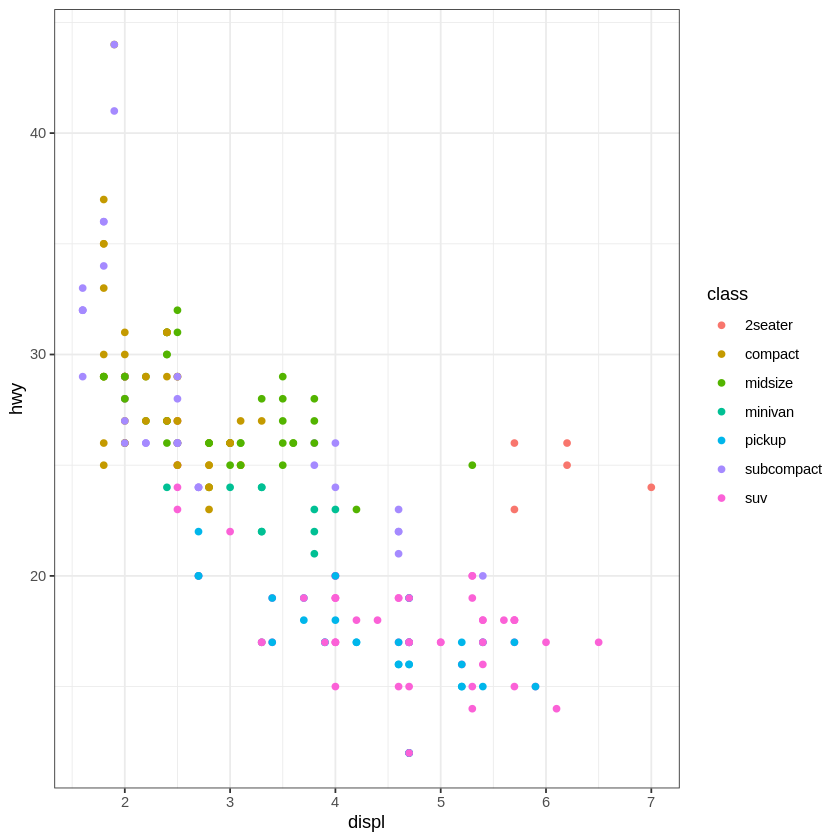

In [2]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

"In the above example, we mapped class to the color aesthetic, but we could have mapped class to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a warning here, because mapping an unordered variable (class) to an ordered aesthetic (size) is not a good idea."

Warning message:
“Using size for a discrete variable is not advised.”


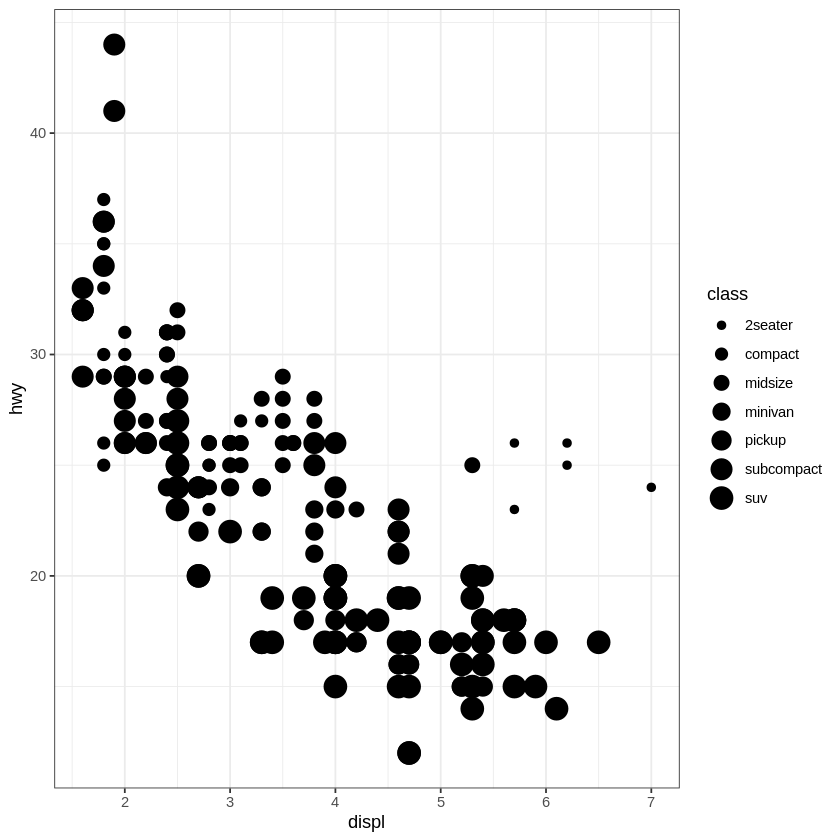

In [3]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

"Or we could have mapped class to the alpha aesthetic, which controls the transparency of the points, or to the shape aesthetic, which controls the shape of the points."

Warning message:
“Using alpha for a discrete variable is not advised.”


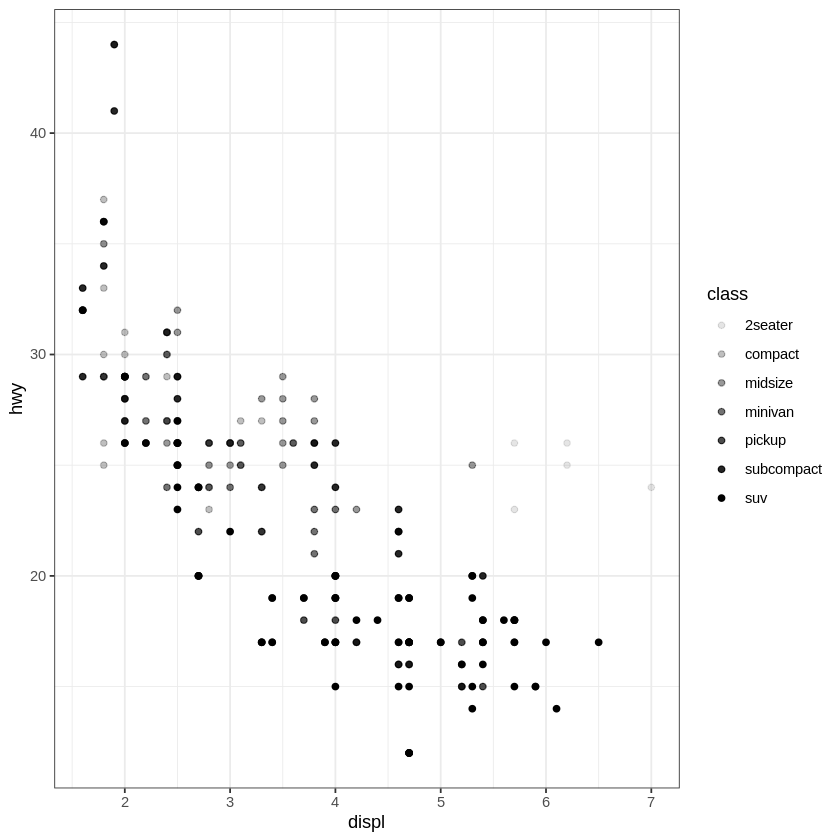

In [4]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


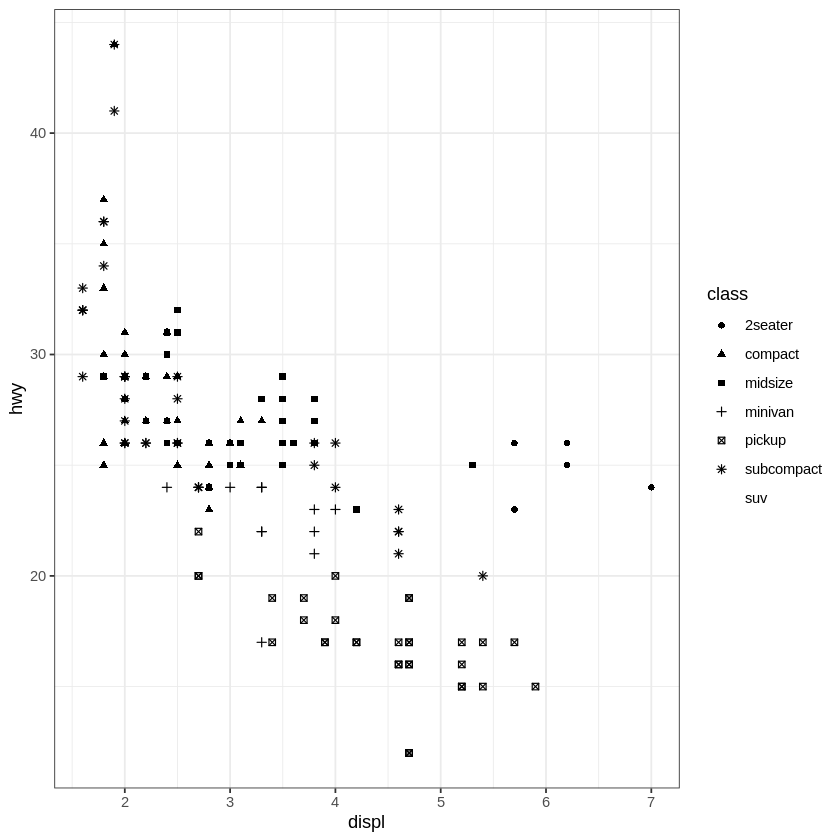

In [5]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

"You can also set the aesthetic properties of your geom manually. For example, we can make all of the points in our plot blue:"

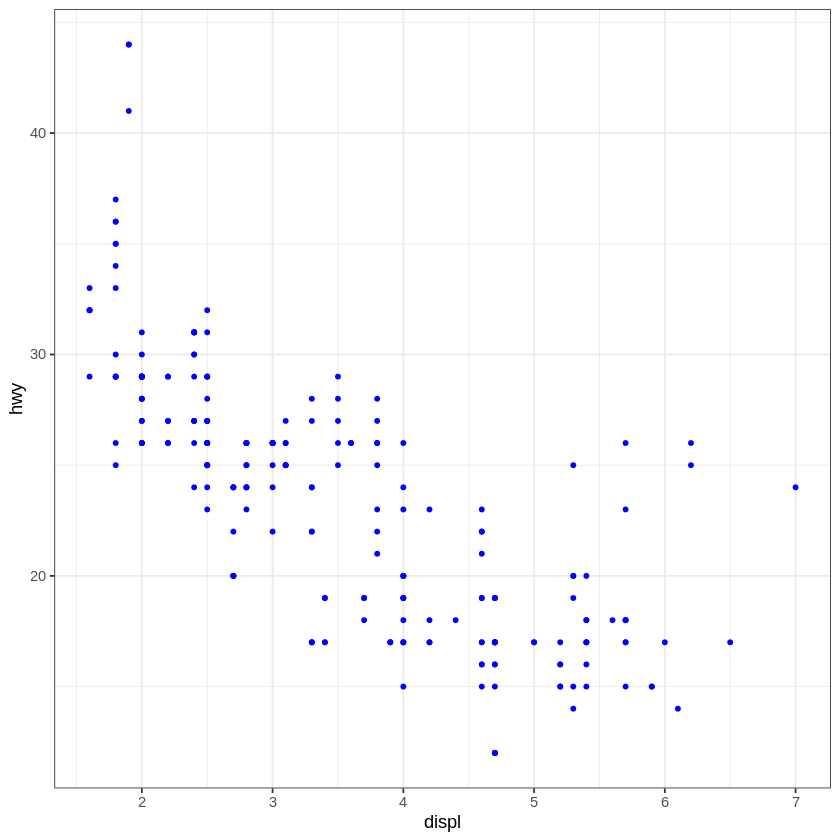

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue", size=1)

## Charts from Vega-Lite Examples

Now, we're going to grab the gapminder data from Vega datasets and do the same charts that we did in the Vega-Lite tutorial.

First, we need to load a library that can read in JSON and then read in the data file.

In [9]:
library(jsonlite)

In [10]:
gapminder <- fromJSON(txt='https://raw.githubusercontent.com/vega/vega-datasets/master/data/gapminder.json')
head(gapminder, 6)

,year,country,cluster,pop,life_expect,fertility
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,1955,Afghanistan,0,8891209,30.332,7.7
2,1960,Afghanistan,0,9829450,31.997,7.7
3,1965,Afghanistan,0,10997885,34.020,7.7
4,1970,Afghanistan,0,12430623,36.088,7.7
5,1975,Afghanistan,0,14132019,38.438,7.7
6,1980,Afghanistan,0,15112149,39.854,7.8


And now we're going to only grab information from 2000.

In [11]:
data2000 <- gapminder[gapminder$year==2000,]
head(data2000,6)

,year,country,cluster,pop,life_expect,fertility
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
10,2000,Afghanistan,0,23898198,42.129,7.4792
21,2000,Argentina,3,37497728,74.340,2.3500
32,2000,Aruba,3,69539,73.451,2.1240
43,2000,Australia,4,19164620,80.370,1.7560
54,2000,Austria,1,8113413,78.980,1.3820
65,2000,Bahamas,3,290075,71.068,2.1111


**Using X and Y encoding channels**

This also shows a different way to specify the dataset and aesthetic.  Note that we don't have to include `data=` or `mapping=` and we can put the `aes()` function in `ggplot()` instead of the mark funtion.

To make this look like the Vega-Lite chart, we're also making some adjustments:
* changing the color of all shapes (not based on data), the shape, and the width of the line.
  * list of available shapes: http://www.sthda.com/english/wiki/ggplot2-point-shapes
* set the range of the x-axis
* set the range and the interval for the tick marks on the y-axis

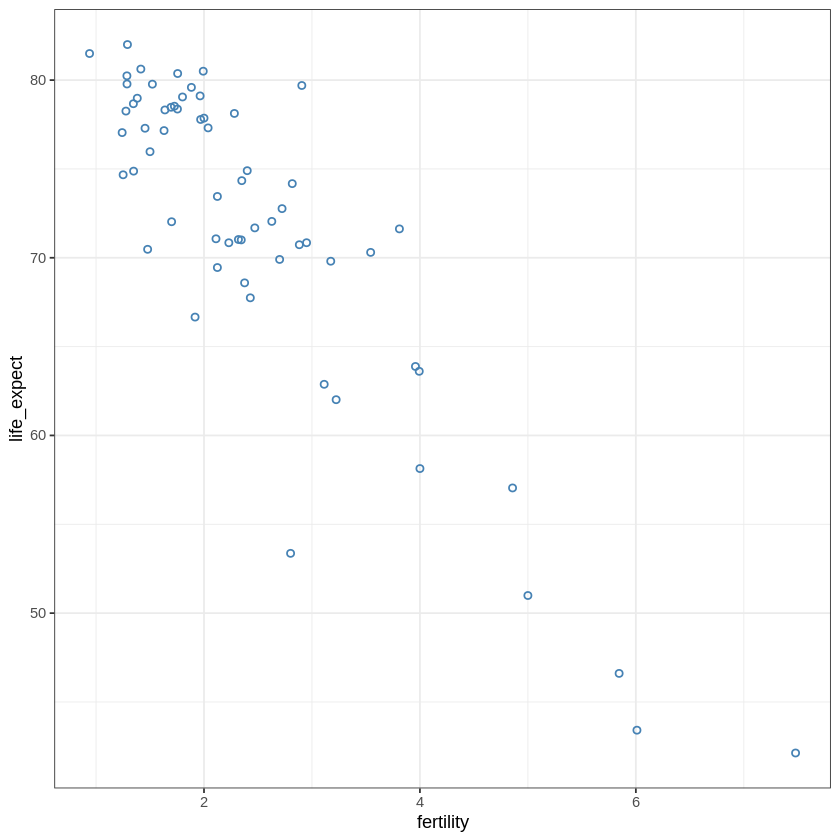

In [12]:
ggplot(data2000, aes(x = fertility, y = life_expect)) + 
  geom_point(color="steelblue", shape=1, stroke=0.75)

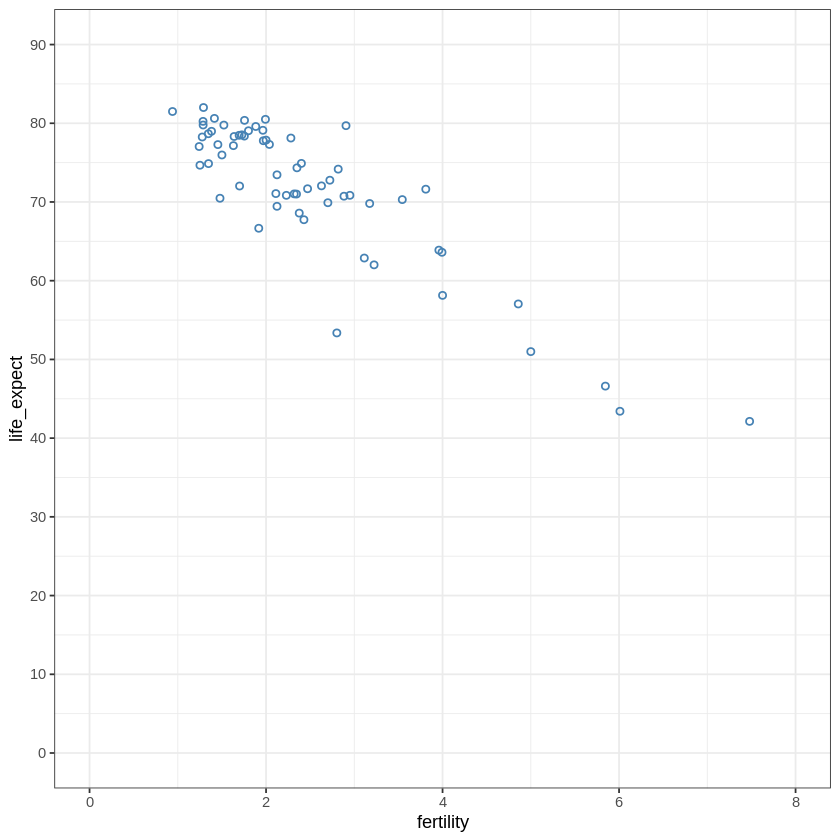

In [13]:
ggplot(data2000, aes(x = fertility, y = life_expect)) + 
  geom_point(color="steelblue", shape=1, stroke=0.75) +
  xlim(0,8) + 
  scale_y_continuous(limits=c(0,90), breaks = seq(0, 90, by = 10))

**Size**

To add size, we just need to specify it in the `aes()` function.

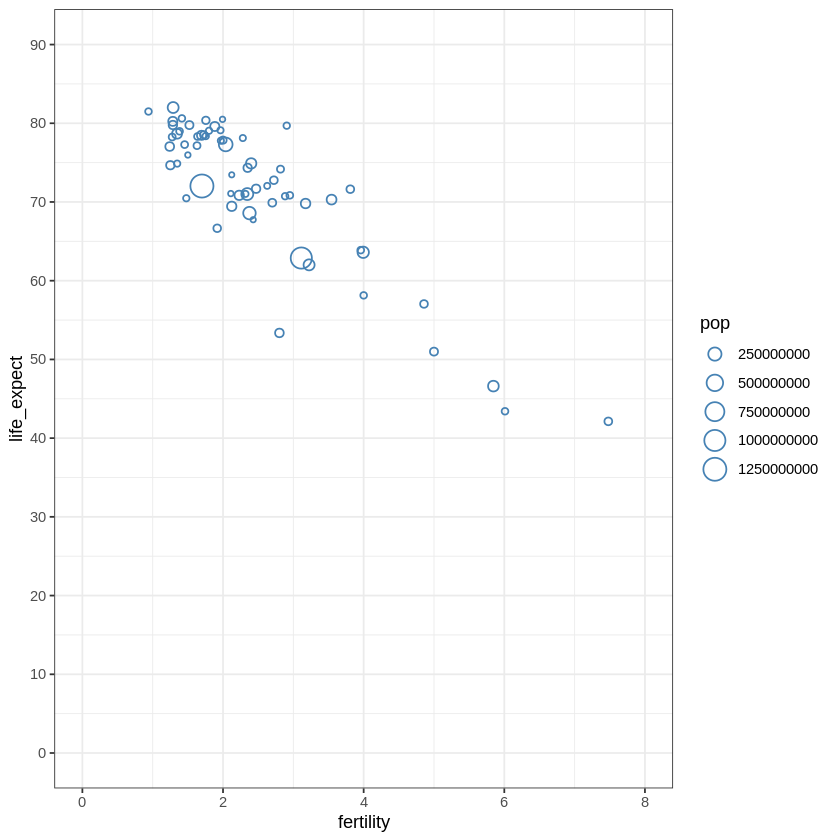

In [15]:
options(scipen=999)
ggplot(data2000, aes(x = fertility, y = life_expect, size=pop)) + 
  geom_point(color="steelblue", stroke=0.75, shape=1) +
  xlim(0,8) + 
  scale_y_continuous(limits=c(0,90), breaks = seq(0, 90, by = 10))

**Color**

To color the points by cluster, we need to use the `factor()` function to represent the integer column as categorical.

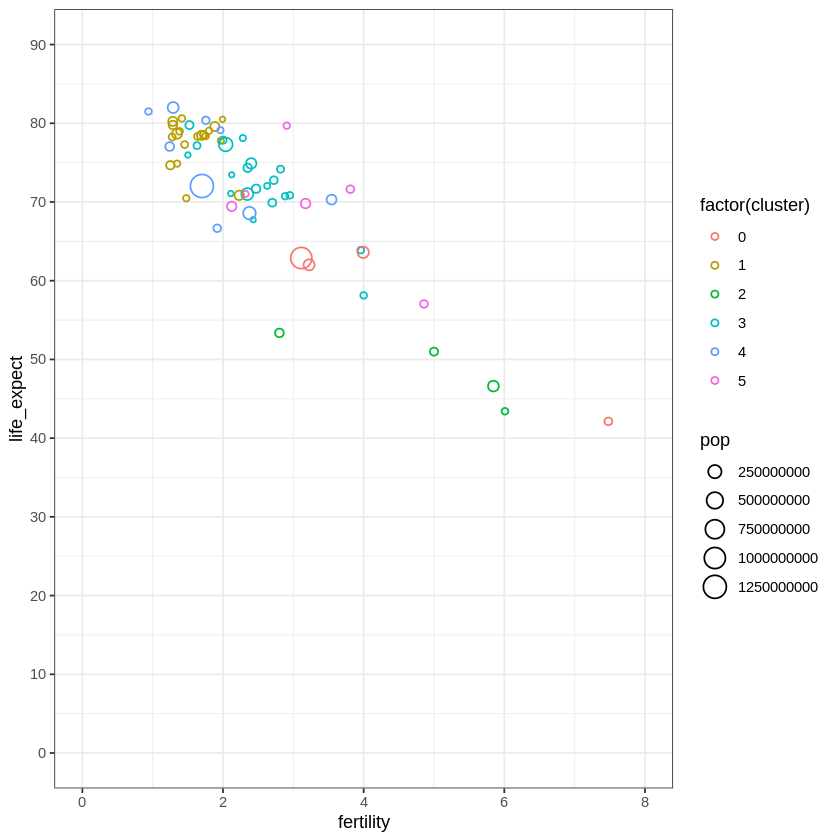

In [16]:
ggplot(data2000, aes(x = fertility, y = life_expect, size=pop, color=factor(cluster))) + 
  geom_point(stroke=0.75, shape=1) +
  xlim(0,8) + 
  scale_y_continuous(limits=c(0,90), breaks = seq(0, 90, by = 10))

**Bar chart**

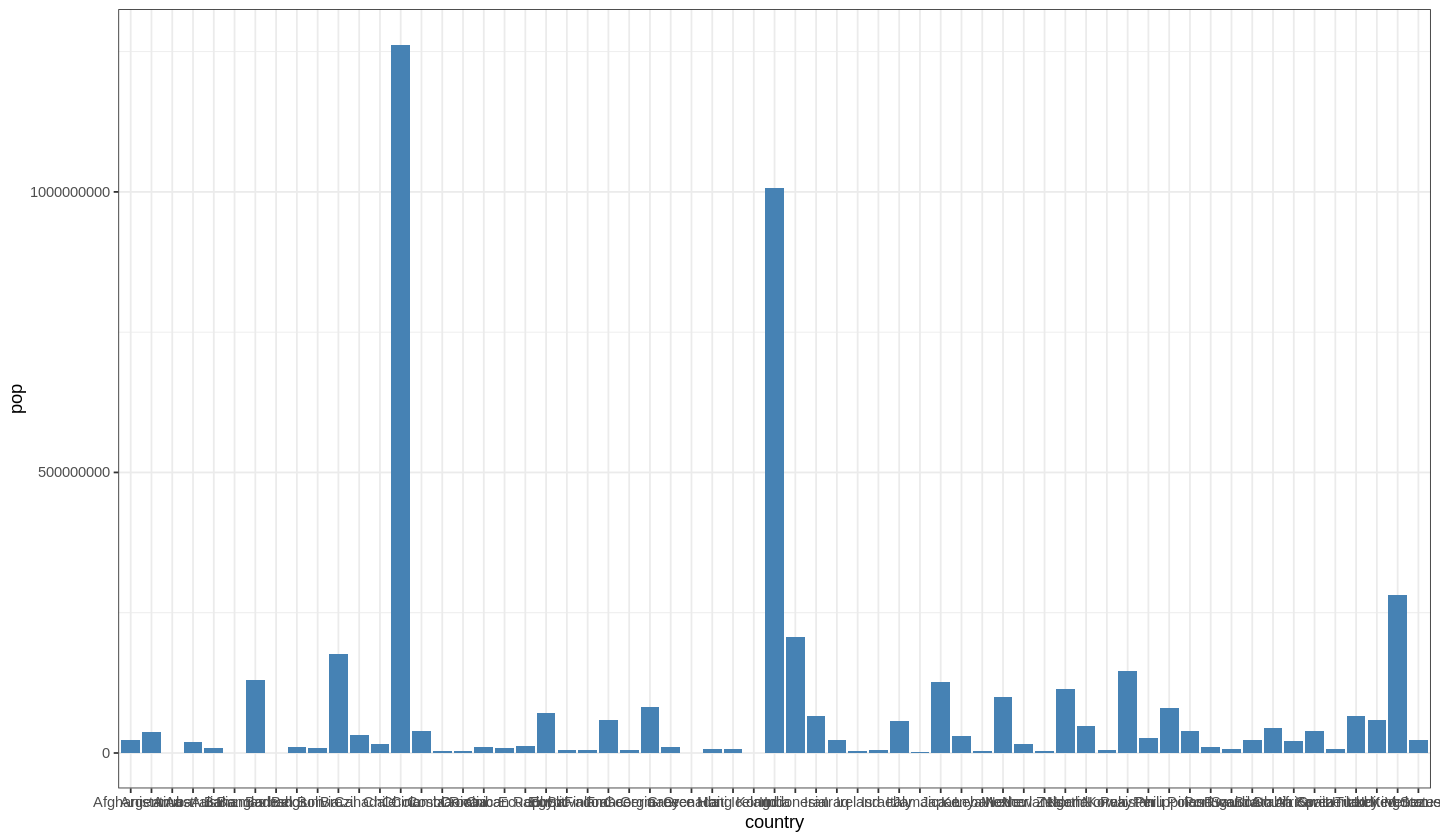

In [19]:
# If you want to not use scientific notation, uncomment next line
#options(scipen=999) 

ggplot(data2000, aes(x=country, y=pop)) +
  geom_col(fill="steelblue")

We can also change the plot size so that it's wider and turn the xlabels sideways.

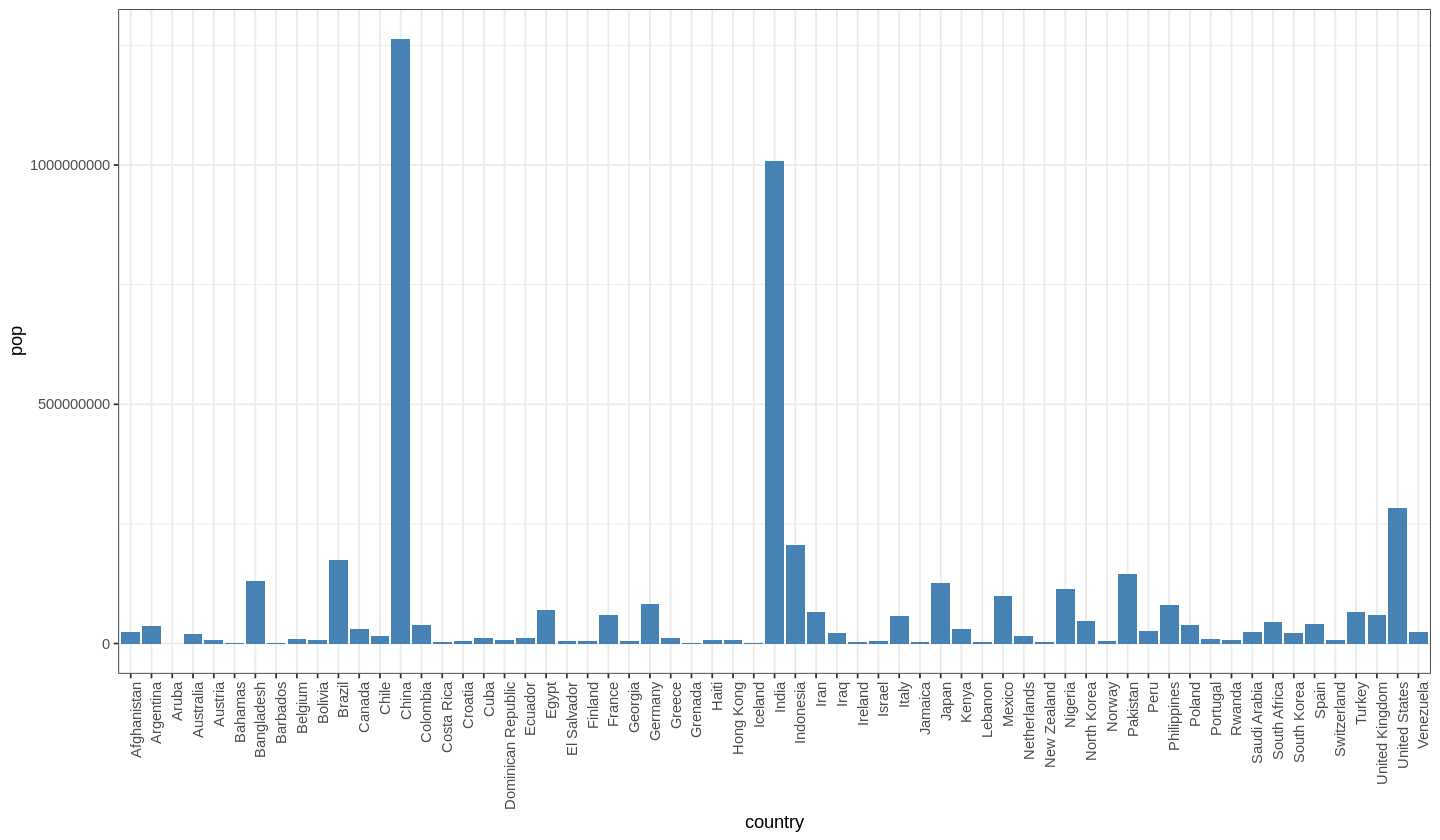

In [18]:
options(repr.plot.width=12)  # this is a global option and will change all plots
ggplot(data2000, aes(x=country, y=pop)) +
  geom_col(fill="steelblue") + 
  theme(axis.text.x=element_text(angle=90, hjust=1))

**Q1:** *Adjust the width of the bars*

**Create a new cell and enter the code below.**

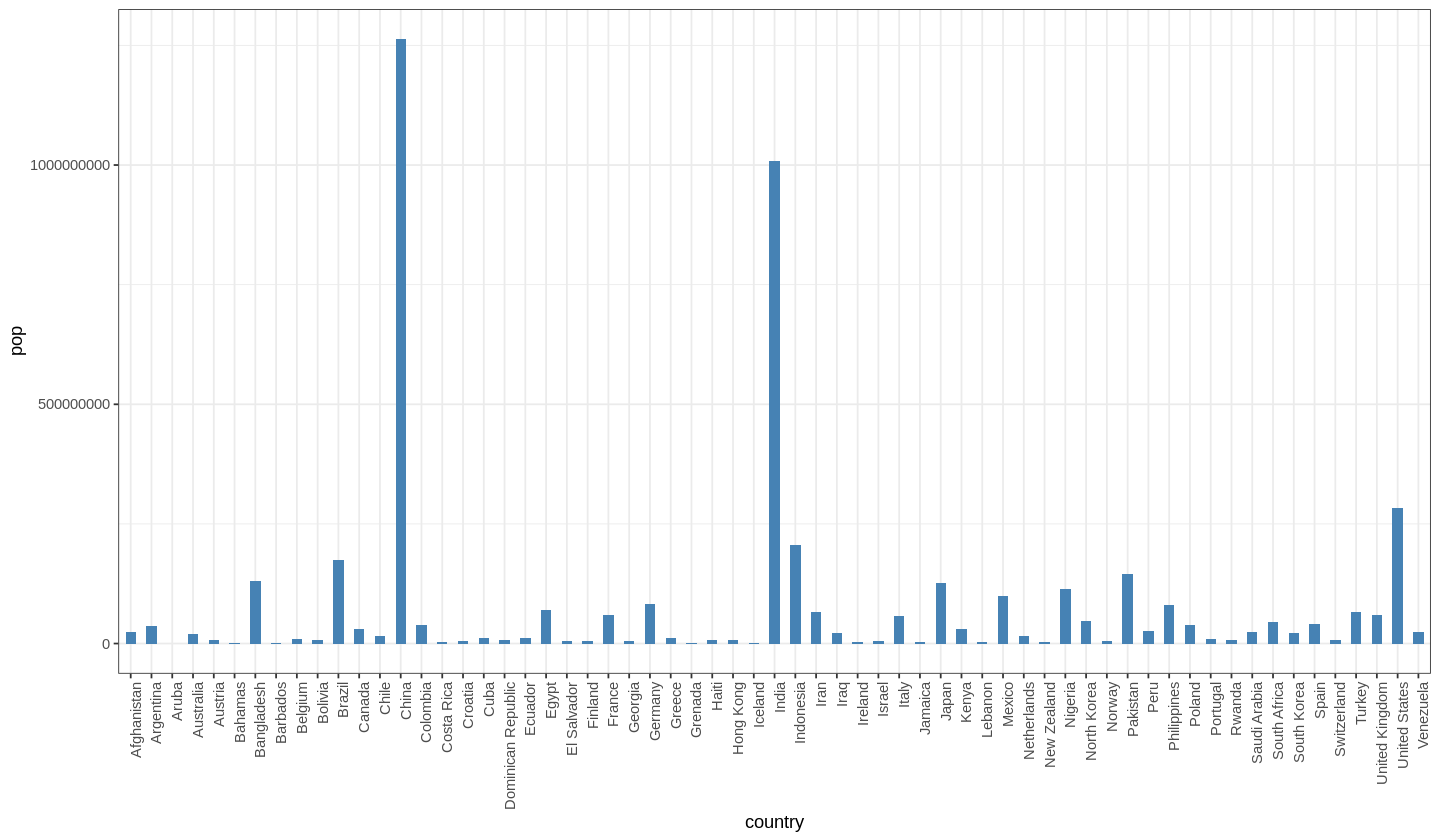

In [25]:
options(repr.plot.width=12) 
ggplot(data2000, aes(x=country, y=pop)) +
  geom_col(fill="steelblue", width=0.5) + 
  theme(axis.text.x=element_text(angle=90, hjust=1))

**Horizontal Bar Chart**

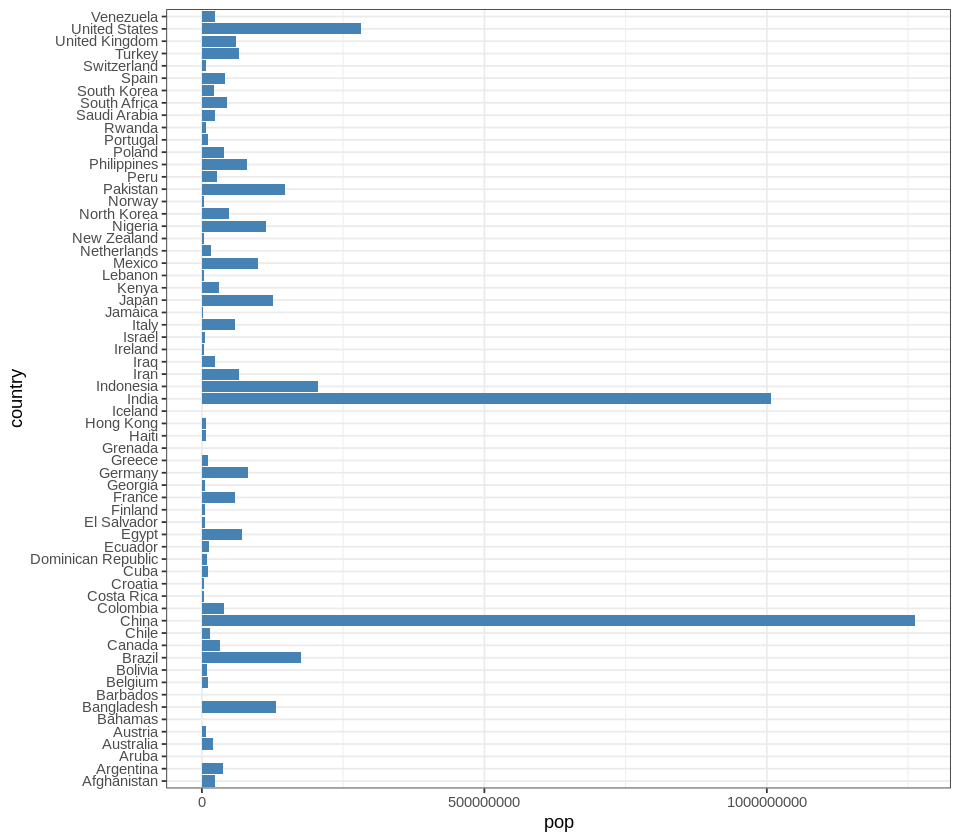

In [26]:
options(repr.plot.width=8)  # set width back to normal
ggplot(data2000, aes(y=country, x=pop)) +
  geom_col(fill="steelblue")

In addition to `geom_col()`, can also use `geom_bar(stat="identity")`

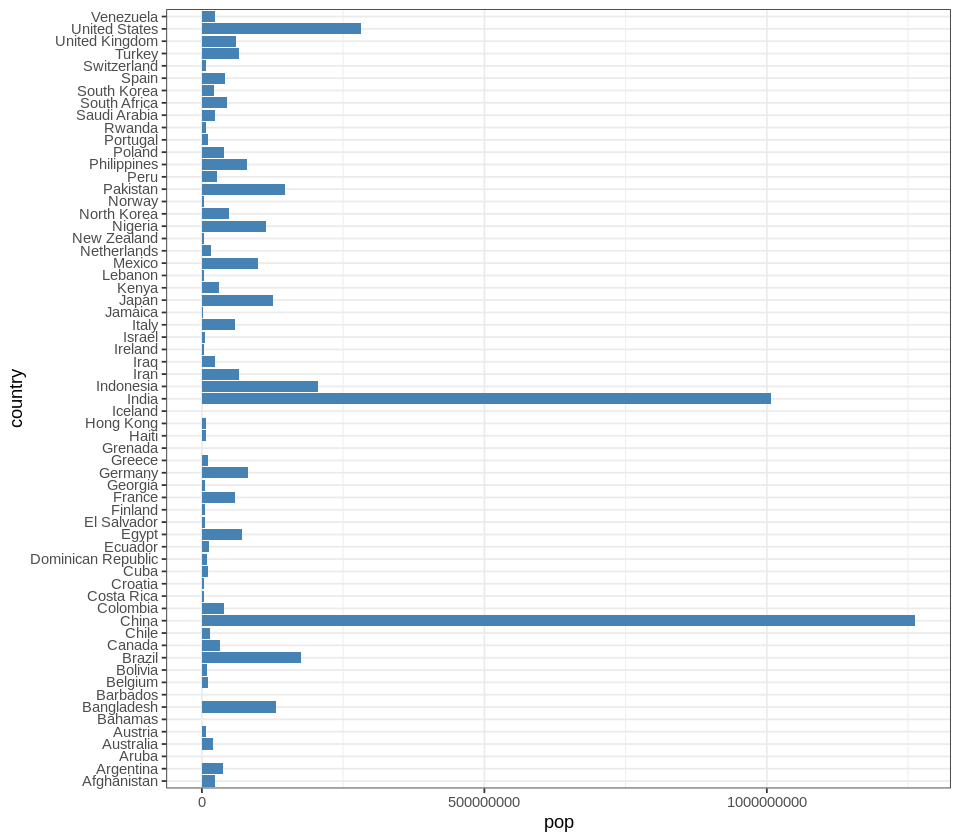

In [27]:
ggplot(data2000, aes(y=country, x=pop)) +
  geom_bar(fill="steelblue", stat="identity") 

**Line chart**

We'll set the `show.legend` option to `FALSE` to prevent the legend from showing.

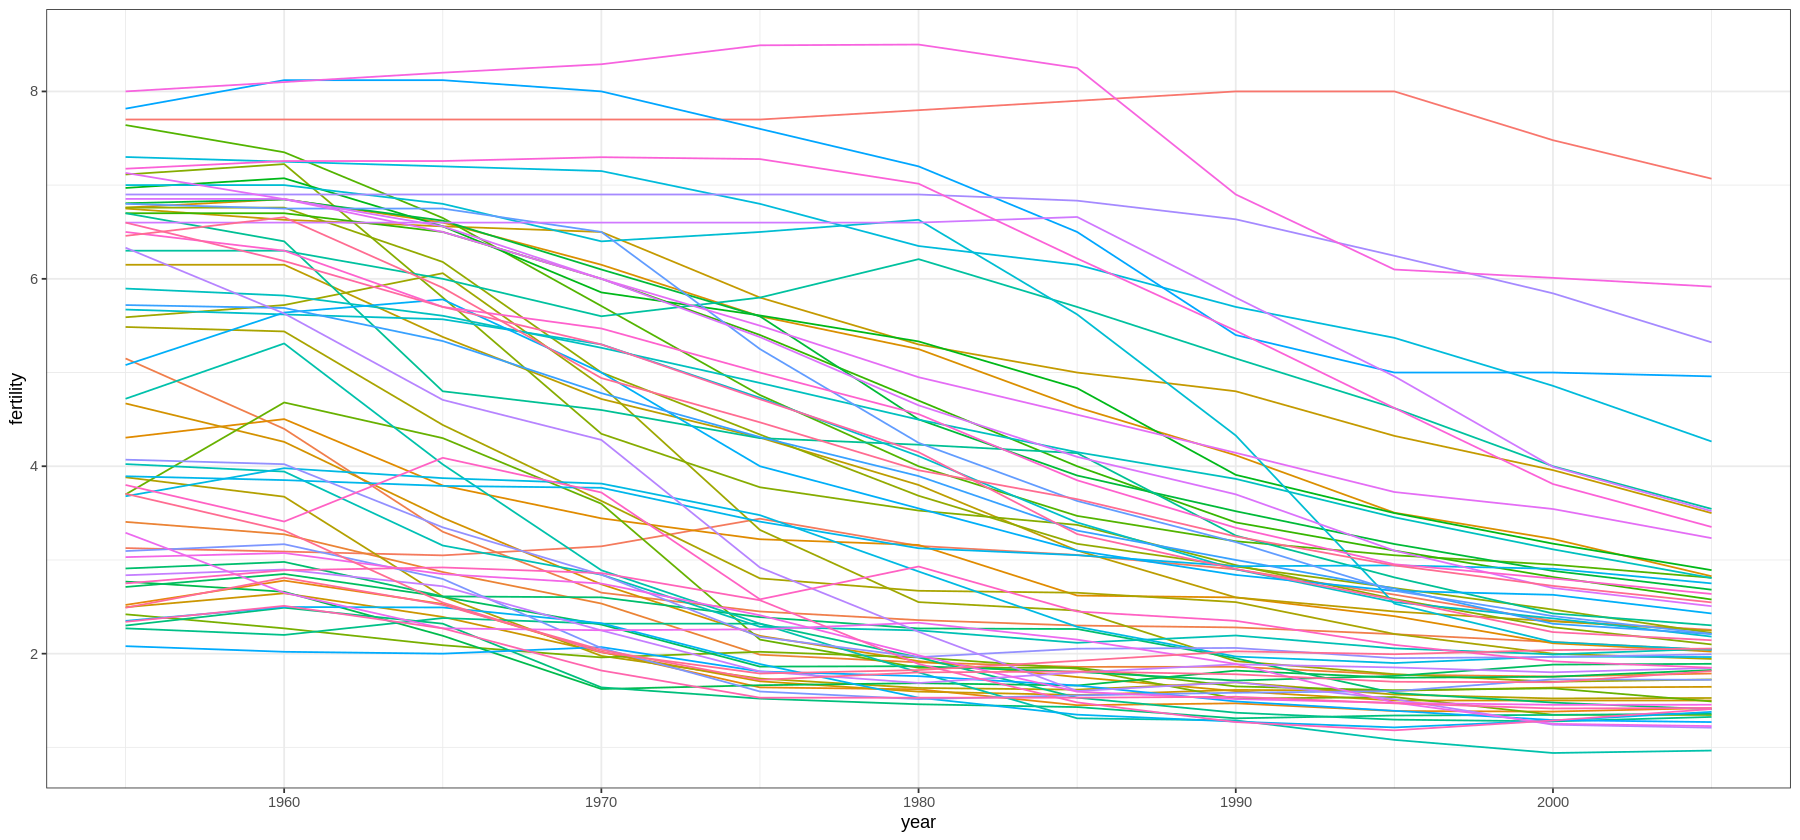

In [30]:
options(repr.plot.width=15) # make the chart wide
ggplot(gapminder, aes(x=year, y=fertility, color=country)) + 
  geom_line(show.legend=FALSE) 

**Q2:** *Make the lines wider -- see the `geom_path()` reference.*

**Create a new cell and enter the code below.**

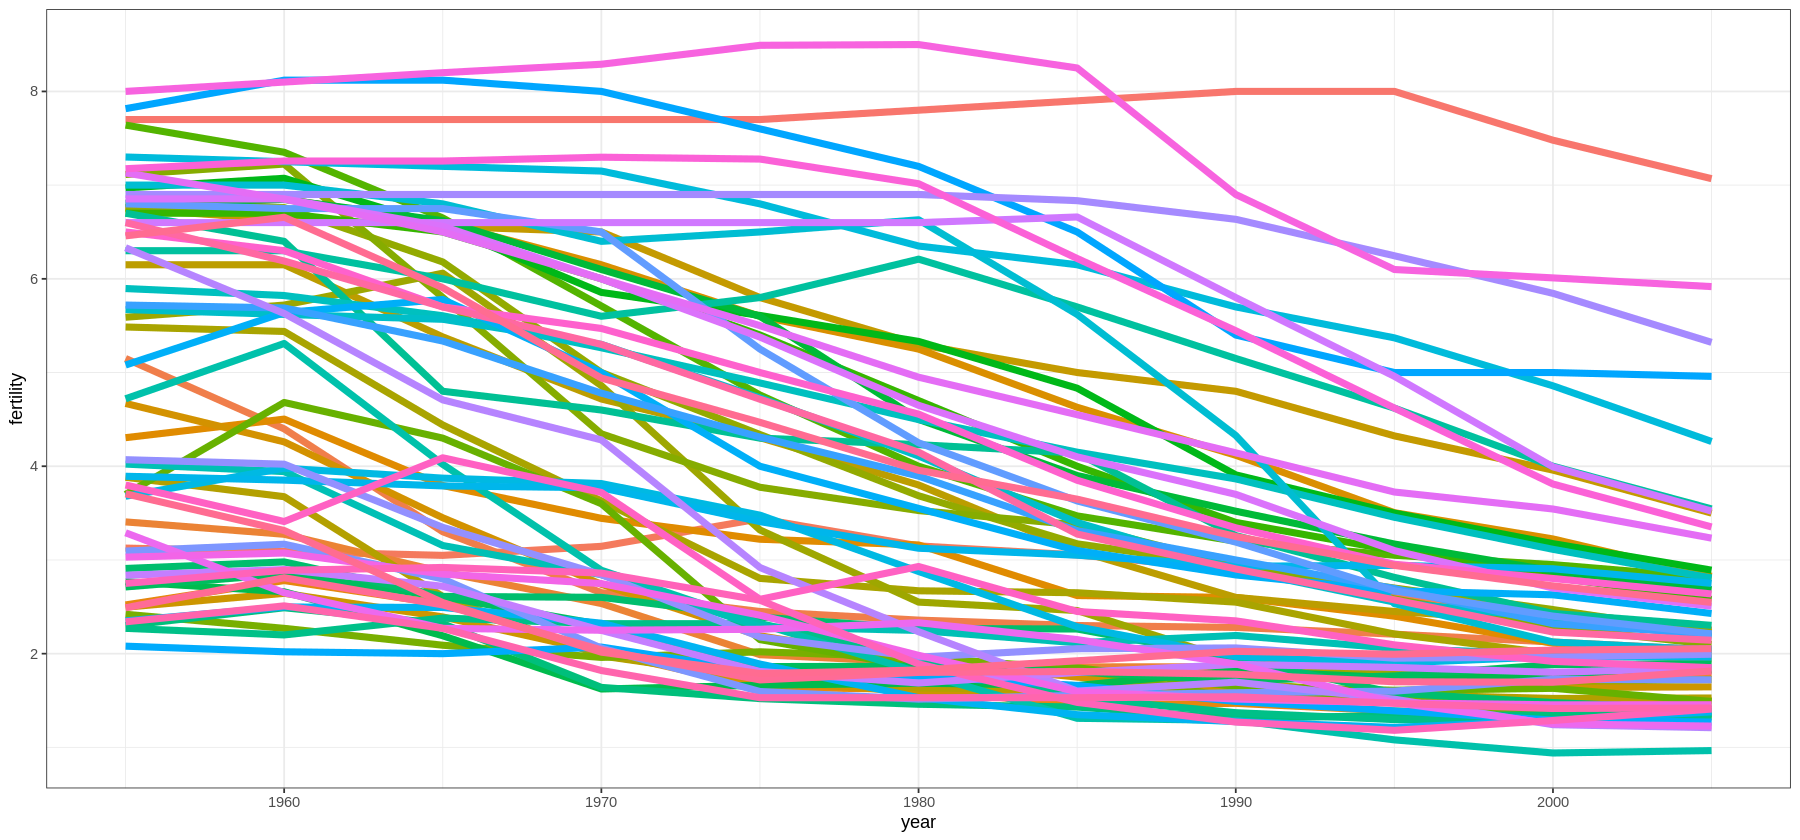

In [33]:
ggplot(gapminder, aes(x=year, y=fertility, color=country)) + 
  geom_line(show.legend=FALSE, size=2) 

**Q3:** *Show only the lines from North America and include the legend.*

**Create a new cell and enter the code below.**

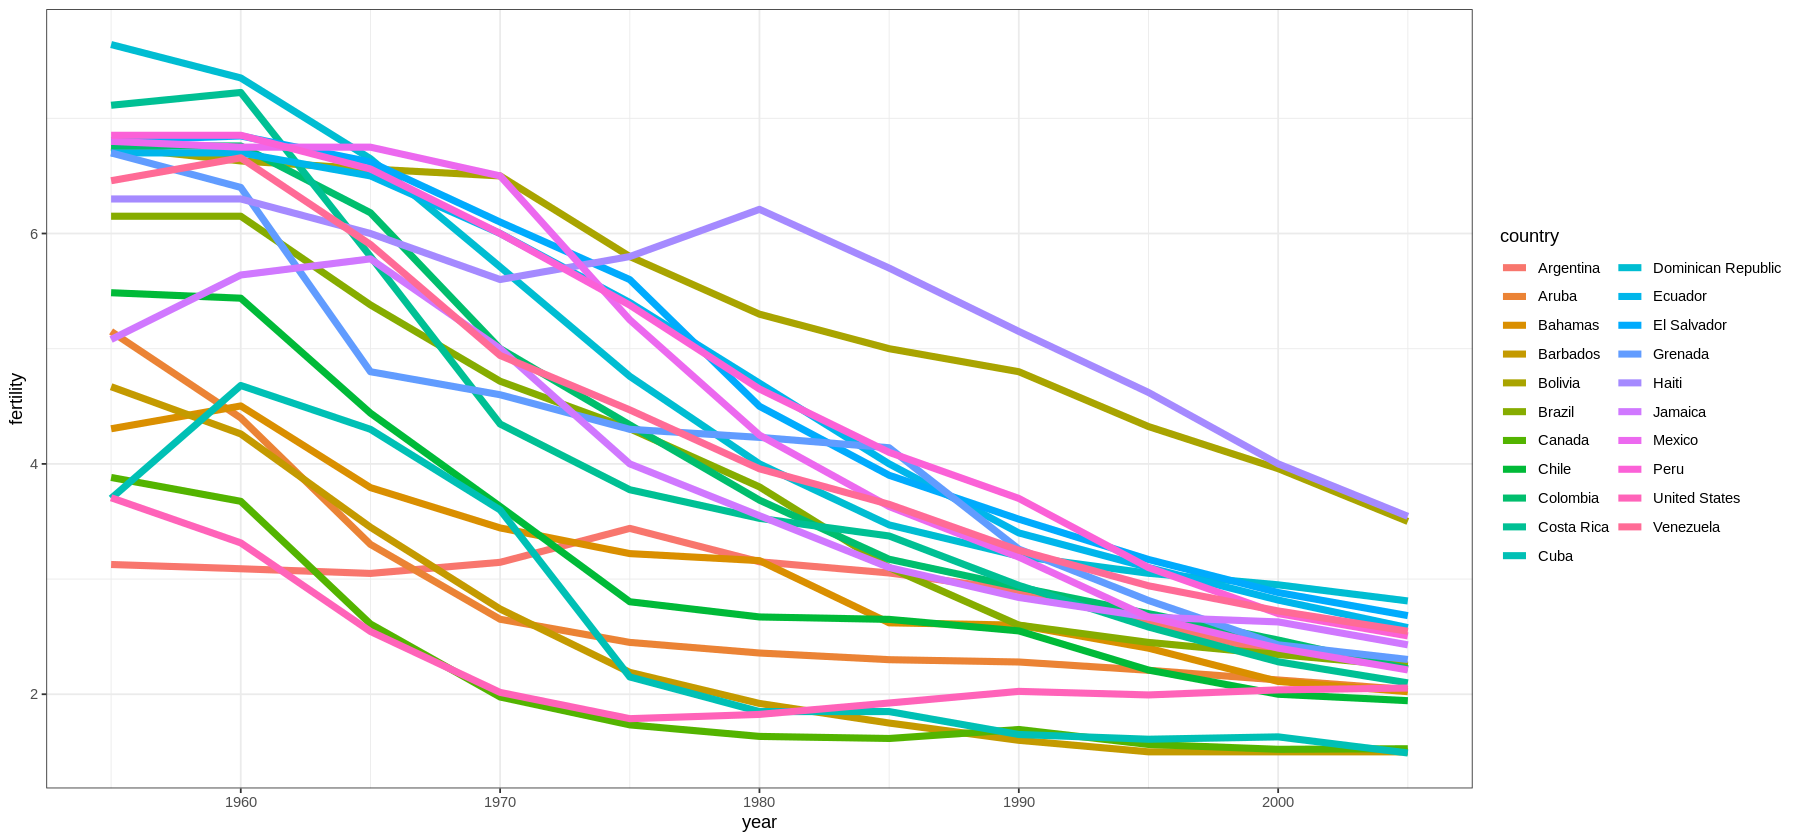

In [36]:
ggplot(gapminder[gapminder$cluster==3,], aes(x=year, y=fertility, color=country)) + 
  geom_line(size=2) 